In [ ]:
!gdown https://drive.google.com/uc?id=1c6bD2dgBeWW5aa--QiRxOg2o2EZacE2P


Downloading...
From: https://drive.google.com/uc?id=1c6bD2dgBeWW5aa--QiRxOg2o2EZacE2P
To: /content/data-cluster-requirement-by-week-and-app.csv
3.31MB [00:00, 51.7MB/s]


In [ ]:
import pandas as pd
import plotly.express as px

pd.set_option('mode.chained_assignment', None)

df = pd.read_csv('/content/data-cluster-requirement-by-week-and-app.csv')

apps = ["zomato", "foodpanda", "ubereats"]

clusters = {203: "Pedido",32: "Retirada",235: "Taxa de Entrega", 165: "Cadastro de Restaurantes",299: "Tempo de Entrega",191: "Instação/Desinstalação",222: "Publicidade",132: "Cupom de Desconto",6: "Efetuar Pagamento",177: "Desconto"}

df_app = True

for app in apps:
  date = []
  df_app = df[df['review_dataset'] == app]
  
  for i, j in df_app.iterrows():
    if j['week'] not in date:
      date.append(j['week'])
  
  for p in date:    
    df_app_date = df_app[df_app['week'] == p]   
    total_app_p = 0

    for line, col in df_app_date.iterrows():
        total_app_p = total_app_p + col['count']

    for cluster in clusters: 
      df_app_date_cluster = df_app_date[df_app_date['requirement_cluster'] == cluster]       
      for i, j in df_app_date_cluster.iterrows(): 
        normalization = j['count']/total_app_p
        df_app.loc[i, 'count'] = normalization
        df_app.loc[i, 'week'] = p.replace("-", "-W")

  for c in clusters:
    df_time_serie = df_app[df_app['requirement_cluster'] == c]
    sorted_df_time_serie = df_time_serie.sort_values(by=["week"], ascending=True)
    
    fig = px.line(sorted_df_time_serie, x='week', y='count', title='<b>App ' + app +' | </b> ' + clusters[c] + ' <i>(Cluster ' + str(c) + ' )</i>')
    fig.show()
   


# Forecasts with Prophet




In [ ]:
!pip install pystan==2.19.1.1
!pip install prophet

     |████████████████████████████████| 71kB 6.2MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 184kB 30.9MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-cp37-none-any.whl size=6640234 sha256=700a91d4e7e8fe3925fb9ac869237ce38b3318bbc8b5d8168a230cf060a8cb66
  Stored in directory: /root/.cache/pip/wheels/92/1d/02/bc0a91bd3a84e060722075d2b0b68e875e37ec7dc49451d513
Successfully built prophet
ERROR: fbprophet 0.7.1 has requirement cmdstanpy==0.9.5, but you'll have cmdstanpy 0.9.68 which is incompatible.
  Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5


In [ ]:
import pandas as pd
from prophet import Prophet

In [ ]:
# pegando uma série temporal de exemplo
!wget https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv
import pandas as pd

ts = pd.read_csv('example_wp_log_peyton_manning.csv')
ts

--2021-04-24 22:49:37--  https://raw.githubusercontent.com/facebook/prophet/master/examples/example_wp_log_peyton_manning.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 86845 (85K) [text/plain]
Saving to: ‘example_wp_log_peyton_manning.csv’

example_wp_log_peyt 100%[===================>]  84.81K  --.-KB/s    in 0.02s   

2021-04-24 22:49:37 (5.28 MB/s) - ‘example_wp_log_peyton_manning.csv’ saved [86845/86845]



,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [ ]:
# separando n exemplos pra treinar
# testando predicoes com s próximo exemplo
n = 300
df_treino = ts[:n]
df_teste = ts[n:n+1].tail(1)

In [ ]:
df_treino

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
295,2008-10-29,7.747165
296,2008-10-30,7.480992
297,2008-10-31,7.346655
298,2008-11-01,7.247081


In [ ]:
df_teste

,ds,y
300,2008-11-03,9.03563


In [ ]:
# treinando
m = Prophet()
m.fit(df_treino)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


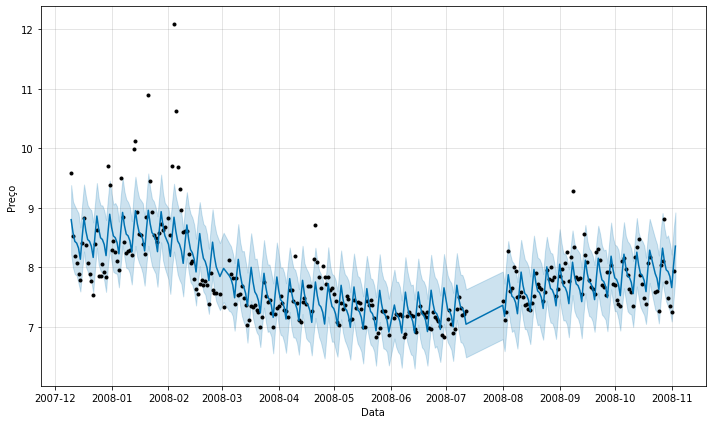

In [ ]:
# predizendo
future = m.make_future_dataframe(periods=1)
forecast = m.predict(future)
forecast.tail(1)

m.plot(forecast, xlabel='Data', ylabel='Preço');

In [ ]:
import numpy as np
# comparando o valor predito com o valor real
pred = forecast.tail(1).yhat.values[0]
real = df_teste.y.values[0]
print('Valor predito:',pred)
print('Valor real:',real)

mape = np.abs((pred-real)/real)*100
print('MAPE (%):', mape) # https://en.wikipedia.org/wiki/Mean_absolute_percentage_error

Valor predito: 8.355882698202096
Valor real: 9.03562977818356
MAPE (%): 7.5229629441293255


# Batch evaluation

In [ ]:
def evaluate(df_serie,n=300,h=1):

  # separando n exemplos pra treinar
  # testando predicoes com os próximo exemplo
  df_treino = ts[:n]
  df_teste = ts[n:n+h]
  
  # treinando o modelo
  m = Prophet()
  m.fit(df_treino)

  # predizendo o ponto no periodo n+h
  future = m.make_future_dataframe(periods=h,freq='W')
  forecast = m.predict(future)

  # avaliando e retornando
  pred = forecast.tail(1).yhat.values[0]
  pred_metadata = forecast.tail(1)
  real = df_teste.y.values[0]

  pred_metadata['y_true'] = real
  pred_metadata['y_pred'] = pred
  #m.plot(forecast, xlabel='Data', ylabel='Preço');

  mape = np.abs((pred-real)/real)*100
  
  return mape, pred_metadata

def evaluate2(df_serie,n=300,h=1):

  # separando n exemplos pra treinar
  # testando predicoes com os próximo exemplo
  df_treino = ts[:n]
  df_teste = ts[n:n+h]
  
  changepoints_req = df_treino.sort_values(by='y')
  changepoints = []
  for cp in changepoints_req[changepoints_req.y >= (np.mean(changepoints_req['y'].to_list()) + np.std(changepoints_req['y'].to_list()))]['ds'].to_list():
      changepoints.append(cp.strftime('%Y-%m-%d'))

  # treinando o modelo
  m = Prophet()
  if len(changepoints) > 0:
    m = Prophet(changepoints=changepoints,n_changepoints=len(changepoints),growth='linear',weekly_seasonality=True,daily_seasonality=True,yearly_seasonality=True)
  m.fit(df_treino)

  # predizendo o ponto no periodo n+h
  m=Prophet(changepoints=changepoints,n_changepoints=len(changepoints), growth='linear', weekly_seasonality=True,daily_seasonality=True,yearly_seasonality=True) 
  
  m.fit(df_treino)
  future = m.make_future_dataframe(periods=h,freq='W')
  forecast = m.predict(future)


  # avaliando e retornando
  pred = forecast.tail(1).yhat.values[0]
  pred_metadata = forecast.tail(1)
  real = df_teste.y.values[0]

  pred_metadata['y_true'] = real
  pred_metadata['y_pred'] = pred
  pred_metadata['changepoints'] = len(changepoints)

  #m.plot(forecast, xlabel='Data', ylabel='Preço');

  mape = np.abs((pred-real)/real)*100
  
  return mape, pred_metadata

In [ ]:
mape, pred_metadata = evaluate(ts,n=300,h=1)
mape

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


10.710230362524237

In [ ]:
pred_metadata

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y_true,y_pred
300,2008-11-09,8.026938,7.517844,8.643976,8.021461,8.033229,0.040955,0.040955,0.040955,0.040955,0.040955,0.040955,0.0,0.0,0.0,8.067893,9.03563,8.067893


In [ ]:
mape, pred_metadata = evaluate(ts,n=300,h=2)
mape

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


10.336702314264144

In [ ]:
pred_metadata

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y_true,y_pred
301,2008-11-16,8.060688,7.546849,8.706445,8.040777,8.080482,0.040955,0.040955,0.040955,0.040955,0.040955,0.040955,0.0,0.0,0.0,8.101644,9.03563,8.101644


In [ ]:
mape, pred_metadata = evaluate(ts,n=300,h=3)
mape

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


9.963174265982584

In [ ]:
pred_metadata

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y_true,y_pred
302,2008-11-23,8.094439,7.548645,8.646205,8.048344,8.143034,0.040955,0.040955,0.040955,0.040955,0.040955,0.040955,0.0,0.0,0.0,8.135394,9.03563,8.135394


In [ ]:
mape, pred_metadata = evaluate(ts,n=300,h=4)
mape

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


9.589646217698272

In [ ]:
pred_metadata

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y_true,y_pred
303,2008-11-30,8.128189,7.590008,8.732822,8.055924,8.207602,0.040955,0.040955,0.040955,0.040955,0.040955,0.040955,0.0,0.0,0.0,8.169145,9.03563,8.169145


#Example of a batch experiment.
###- One loop per series.
###- Need to make the series in the same format as ts


In [ ]:
from tqdm.notebook import tqdm
# algoritmo para treinar em lote
nome_serie = 'app_x_cluster_y'
L = []
for n in tqdm(range(len(ts)-25,len(ts)-5)):
  for h in range(1,5):
    mape, pred_metadata = evaluate(ts,n=n,h=h)
    pred_metadata['mape']=mape
    pred_metadata['nome_serie']=nome_serie
    pred_metadata['n']=n
    pred_metadata['h']=h
    L.append(pred_metadata)


  

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


KeyboardInterrupt: ignored

In [ ]:
df_results = pd.concat(L)
df_results

In [ ]:
df_results.to_excel('results_final.xls')

# Batch Experiment (App/Cluster)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
from tqdm.notebook import tqdm
from prophet import Prophet
import datetime
import time

pd.set_option('mode.chained_assignment', None)

df = pd.read_csv('/content/data-cluster-requirement-by-week-and-app.csv')

apps = ["zomato", "foodpanda", "ubereats"]
clusters = {203: "Pedido",32: "Retirada",235: "Taxa de Entrega", 165: "Cadastro de Restaurantes",299: "Tempo de Entrega",191: "Instação/Desinstalação",222: "Publicidade",132: "Cupom de Desconto",6: "Efetuar Pagamento",177: "Desconto"}

df_app = True
L = []
L2 = []
last_ds = None
for app in apps:
  date = []
  df_app = df[df['review_dataset'] == app]
  
  for i, j in df_app.iterrows():
    if j['week'] not in date:
      date.append(j['week'])
  
  for p in date:    
    df_app_date = df_app[df_app['week'] == p]   
    total_app_p = 0

    for line, col in df_app_date.iterrows():
        total_app_p = total_app_p + col['count']

    for cluster in clusters: 
      df_app_date_cluster = df_app_date[df_app_date['requirement_cluster'] == cluster]       
      
      for i, j in df_app_date_cluster.iterrows(): 
        normalization = j['count']/total_app_p
        df_app.loc[i, 'count'] = normalization
        newDate = p.split('-')
        firstdayofweek = datetime.datetime.strptime(f'{newDate[0]}-W{int(newDate[1] )- 1}-1', "%Y-W%W-%w").date()
        df_app.loc[i, 'week'] = firstdayofweek
        
  for c in tqdm(clusters):
    df_app_date_cluster = df_app[df_app['requirement_cluster'] == c]
    ts =  df_app_date_cluster[(df_app_date_cluster['week'] >= pd.to_datetime('2018-09-03'))]
    ts.drop('requirement_cluster',axis=1,inplace=True)
    ts.drop('review_dataset',axis=1,inplace=True)
    ts.columns = ['ds', 'y']
    ts = ts.sort_values(by=['ds'], ascending=True)
    nome_serie = 'app_'+app+'_cluster_'+str(c)
    print(nome_serie)



    
    for n in tqdm(range(len(ts)-25,len(ts)-5)):
      for h in range(1,5):
        #mape, pred_metadata = evaluate(ts,n=n,h=h)
        #pred_metadata['mape']=mape
        #pred_metadata['nome_serie']=nome_serie
        #pred_metadata['n']=n
        #pred_metadata['h']=h
        #L.append(pred_metadata)
        #print(pred_metadata)



        mape2, pred_metadata2 = evaluate2(ts,n=n,h=h)
        pred_metadata2['mape']=mape2
        pred_metadata2['nome_serie']=nome_serie
        pred_metadata2['n']=n
        pred_metadata2['h']=h
        L2.append(pred_metadata2)
        #print(pred_metadata)

#df_results = pd.concat(L)
#df_results.to_excel('results_final.xls')  

df_results2 = pd.concat(L2)
df_results2.to_excel('results_final2.xls')  

app_zomato_cluster_203



app_zomato_cluster_32



app_zomato_cluster_235



app_zomato_cluster_165



app_zomato_cluster_299



app_zomato_cluster_191



app_zomato_cluster_222



app_zomato_cluster_132



app_zomato_cluster_6



app_zomato_cluster_177


app_foodpanda_cluster_203



app_foodpanda_cluster_32



app_foodpanda_cluster_235



app_foodpanda_cluster_165



app_foodpanda_cluster_299



app_foodpanda_cluster_191



app_foodpanda_cluster_222



app_foodpanda_cluster_132



app_foodpanda_cluster_6



app_foodpanda_cluster_177


app_ubereats_cluster_203



app_ubereats_cluster_32



app_ubereats_cluster_235



app_ubereats_cluster_165



app_ubereats_cluster_299



app_ubereats_cluster_191



app_ubereats_cluster_222



app_ubereats_cluster_132



app_ubereats_cluster_6



app_ubereats_cluster_177


In [ ]:
df_results = pd.concat(L)
df_results.to_excel('drive/MyDrive/results_final.xls')  

df_results2 = pd.concat(L2)
df_results2.to_excel('drive/MyDrive/results_final2.xls')  

In [ ]:
df_results

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,y_true,y_pred,mape,nome_serie,n,h,yearly,yearly_lower,yearly_upper
104,2020-09-06,0.020892,0.017695,0.024140,0.020892,0.020892,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.020892,0.016823,0.020892,24.189677,app_zomato_cluster_203,104,1,NaN,NaN,NaN
105,2020-09-13,0.020890,0.017522,0.024128,0.020890,0.020890,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.020890,0.016823,0.020890,24.172885,app_zomato_cluster_203,104,2,NaN,NaN,NaN
106,2020-09-20,0.020887,0.017476,0.024149,0.020887,0.020887,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.020887,0.016823,0.020887,24.156094,app_zomato_cluster_203,104,3,NaN,NaN,NaN
107,2020-09-27,0.020884,0.017432,0.024028,0.020884,0.020884,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.020884,0.016823,0.020884,24.139302,app_zomato_cluster_203,104,4,NaN,NaN,NaN
105,2020-09-13,0.020252,0.017018,0.022595,0.020252,0.020252,-0.000385,-0.000385,-0.000385,0.0,0.0,0.0,0.019866,0.015778,0.019866,25.914410,app_zomato_cluster_203,105,1,-0.000385,-0.000385,-0.000385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,2020-10-18,0.015586,0.012369,0.015715,0.015586,0.015586,-0.001485,-0.001485,-0.001485,0.0,0.0,0.0,0.014101,0.015744,0.014101,10.436749,app_zomato_cluster_32,107,4,-0.001485,-0.001485,-0.001485
108,2020-10-04,0.015566,0.013797,0.017026,0.015566,0.015566,-0.000137,-0.000137,-0.000137,0.0,0.0,0.0,0.015428,0.016607,0.015428,7.095072,app_zomato_cluster_32,108,1,-0.000137,-0.000137,-0.000137
109,2020-10-11,0.015558,0.013069,0.016444,0.015558,0.015558,-0.000800,-0.000800,-0.000800,0.0,0.0,0.0,0.014758,0.016607,0.014758,11.133486,app_zomato_cluster_32,108,2,-0.000800,-0.000800,-0.000800
110,2020-10-18,0.015550,0.012346,0.015734,0.015550,0.015550,-0.001505,-0.001505,-0.001505,0.0,0.0,0.0,0.014045,0.016607,0.014045,15.424823,app_zomato_cluster_32,108,3,-0.001505,-0.001505,-0.001505


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
np.mean(df_results.sort_values(by='y_true',ascending=False).head(10)['mape'].to_list())

9.842678216716546

In [ ]:
np.mean(df_results2.sort_values(by='y_true',ascending=False).head(10)['mape'].to_list())

10.174478822790332

In [ ]:
np.mean(df_results2['mape'].to_list())

9.882323676604274

In [ ]:
np.mean(df_results['mape'].to_list())

12.44256959168211